In [1]:
%matplotlib widget
import numpy as np
import caiman as cm
import matplotlib.pyplot as plt
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import cnmf
from caiman.source_extraction.cnmf.params import CNMFParams
from caiman.utils.visualization import view_quilt
import pandas as pd

# 2-Photon Source Extraction

## Preparing data for Source Extraction

In [2]:
fname = "../data/Sue_2x_3000_40_-46.tif"
movie_orig = cm.load(fname)

In [3]:
# motion correction
params = CNMFParams()
motion_params = {
    'strides': (48, 48),
    'overlaps': (24, 24),
    'max_shifts': (6, 6),
    'max_deviation_rigid': 3,
    'pw_rigid': True
}
params.motion.update(motion_params)
mc = MotionCorrect(fname, **params.motion)
mc.motion_correct(save_movie=True)
mc.fname_tot_els

['../data\\Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

In [4]:
mc_fname = cm.save_memmap(
    mc.fname_tot_els,
    base_name='memmap_',
    order='C'
)

In [5]:
Yr, dims, num_frames = cm.load_memmap(mc_fname)
images = np.reshape(Yr.T, [num_frames] + list(dims), order='F')
images.shape

(3000, 170, 170)

## Setting Parameters

1. Is the patch width at least three times the width of a neuron?
2. Do individual neurons fit in the overlap region (stride)? 
3. Is gSig about half the width of neuron? 
4. K: how many neurons are in each patch? Upper bound.

**Example** Plot the patches with rf=15 and stride=10 and answer the first two questions

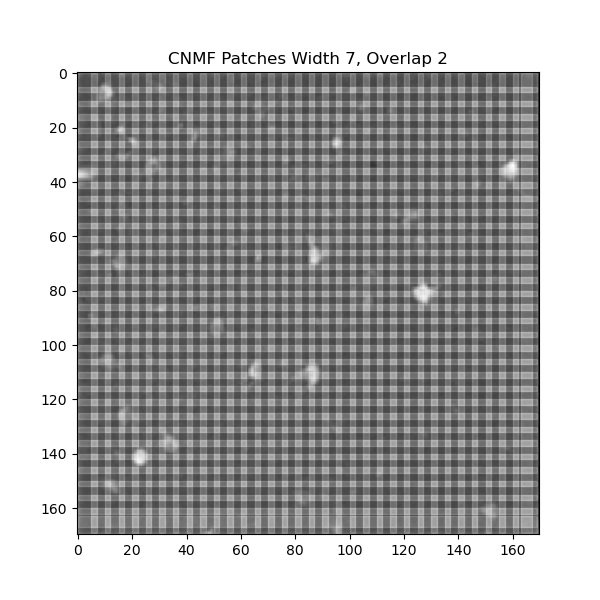

In [7]:
patch_params = {
    "rf": 3,
    "stride": 1
}
params.patch.update(patch_params)
cnmf_model = cnmf.CNMF(n_processes=1, params=params)

cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_patch_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_stride = cnmf_patch_width - cnmf_patch_overlap

correlation_image = cm.local_correlations(images, swap_dim=False)

patch_ax = view_quilt(correlation_image, 
                      cnmf_patch_stride, 
                      cnmf_patch_overlap, 
);
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_patch_overlap}');

Plot the patches with rf=5 and stride=3 and answer the first two questions

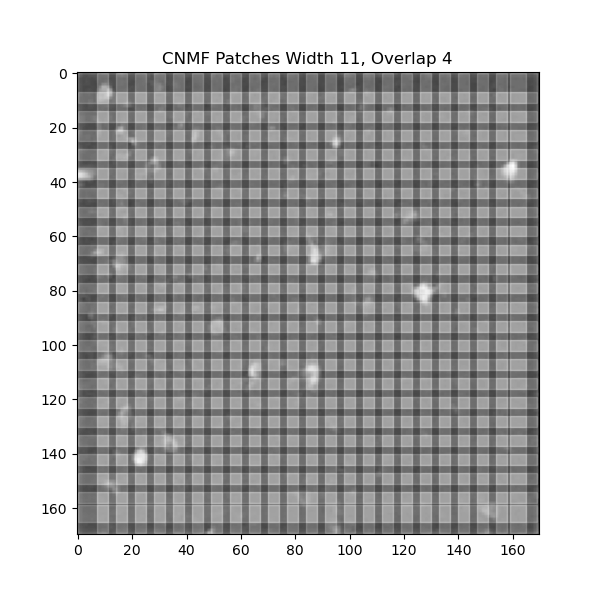

In [8]:
patch_params = {
    "rf": 5,
    "stride": 3
}
params.patch.update(patch_params)
cnmf_model = cnmf.CNMF(n_processes=1, params=params)

cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_patch_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_stride = cnmf_patch_width - cnmf_patch_overlap

correlation_image = cm.local_correlations(images, swap_dim=False)

patch_ax = view_quilt(correlation_image, 
                      cnmf_patch_stride, 
                      cnmf_patch_overlap, 
);
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_patch_overlap}');

Plot the patches with rf=15 and stride=3 and answer the first two questions

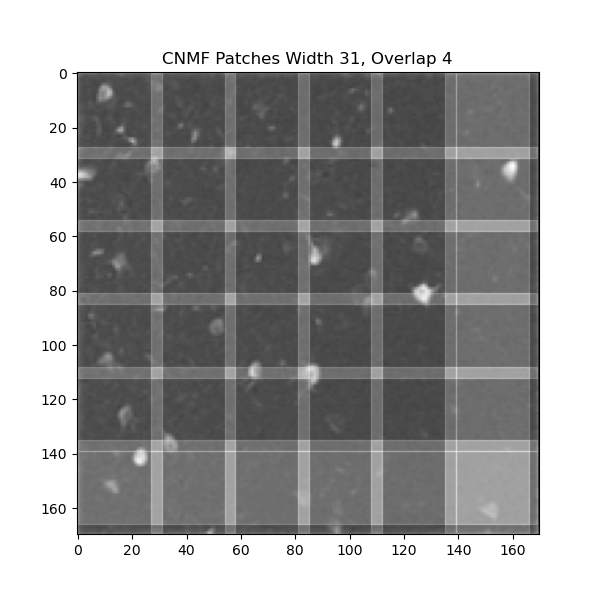

In [9]:
patch_params = {
    "rf": 15,
    "stride": 3
}
params.patch.update(patch_params)
cnmf_model = cnmf.CNMF(n_processes=1, params=params)

cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_patch_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_stride = cnmf_patch_width - cnmf_patch_overlap

correlation_image = cm.local_correlations(images, swap_dim=False)

patch_ax = view_quilt(correlation_image, 
                      cnmf_patch_stride, 
                      cnmf_patch_overlap, 
);
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_patch_overlap}');

Plot the patches with rf=15 and stride=10 and answer the first two questions

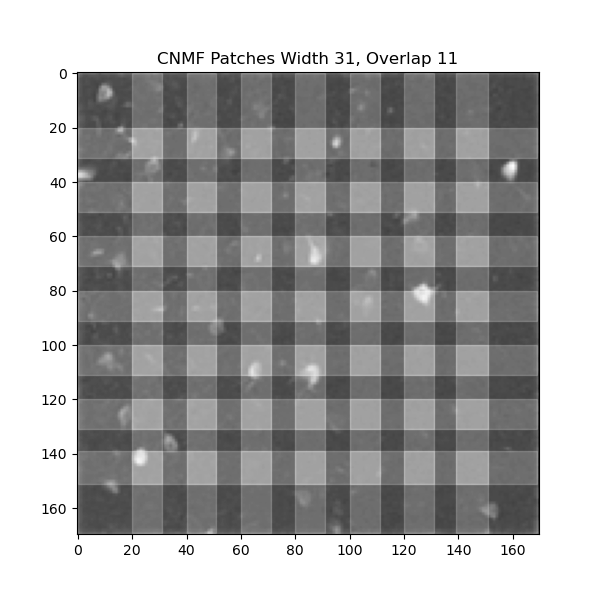

In [10]:
patch_params = {
    "rf": 15,
    "stride": 10
}
params.patch.update(patch_params)
cnmf_model = cnmf.CNMF(n_processes=1, params=params)

cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_patch_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_stride = cnmf_patch_width - cnmf_patch_overlap

correlation_image = cm.local_correlations(images, swap_dim=False)

patch_ax = view_quilt(correlation_image, 
                      cnmf_patch_stride, 
                      cnmf_patch_overlap, 
);
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_patch_overlap}');

Look at the densest region of the median image to set K and gSig

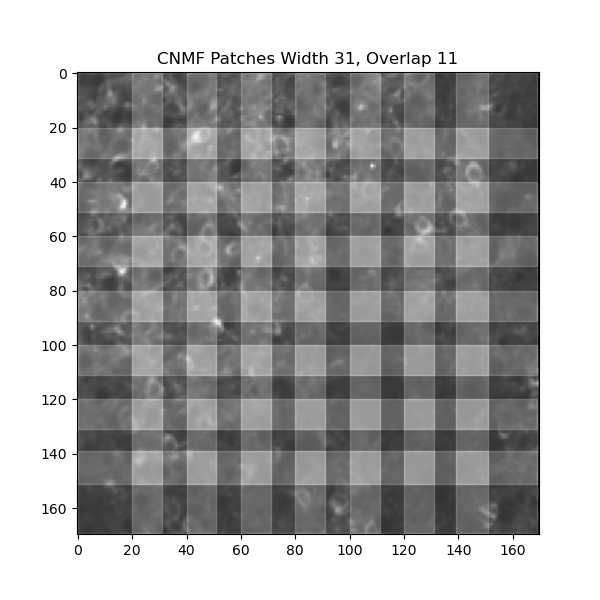

In [14]:
patch_params = {
    "rf": 15,
    "stride": 10
}
params.patch.update(patch_params)
cnmf_model = cnmf.CNMF(n_processes=1, params=params)

cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_patch_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_stride = cnmf_patch_width - cnmf_patch_overlap

max_proj = np.median(images, axis=0)

patch_ax = view_quilt(max_proj, 
                      cnmf_patch_stride, 
                      cnmf_patch_overlap, 
);
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_patch_overlap}');

In [15]:
gsig_K = {
    'gSig': 4,
    'K': 7
    }

cnmf_model.params.change_params(gsig_K)


CNMFParams:

data:

{'caiman_version': '1.9.16',
 'decay_time': 0.4,
 'dims': None,
 'dxy': (1, 1),
 'fnames': None,
 'fr': 30,
 'last_commit': 'GITW-e877f8490a5867af5db205162bdf02e02625f64d',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 1,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvolution': 'oasis',
 'nb': 1,
 'noise_method': 'mean',
 'noise_range': [0.25, 0.5],
 'n

## CNMF Model

In [16]:
cnmf_fit = cnmf_model.fit(images)
cnmf_fit.estimates.plot_contours_nb(img=correlation_image);

In [17]:
cnmf_refit = cnmf_fit.refit(images)
cnmf_refit.estimates.plot_contours_nb(img=correlation_image);

## Exploring the Estimates Class

**Example** How many components were identified by `cnmf_fit`

In [18]:
cnmf_fit.estimates.C.shape

(292, 3000)

How many components were identified by `cnmf_refit`

In [19]:
cnmf_refit.estimates.C.shape

(291, 3000)

How many background components in `cnmf_fit`?

In [24]:
cnmf_fit.estimates.b.shape

(28900, 1)

How many background components in `cnmf_refit`?

In [26]:
cnmf_refit.estimates.b.shape

(28900, 1)

**Example** Plot the denoised calcium traces of first component from refit

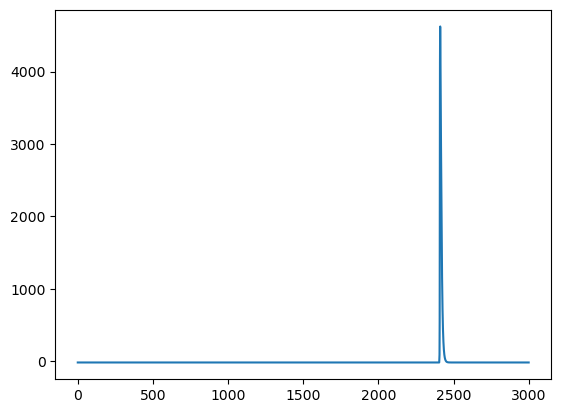

In [37]:
plt.plot(cnmf_refit.estimates.C[0]);

Plot the denoised calcium traces of second component from refit

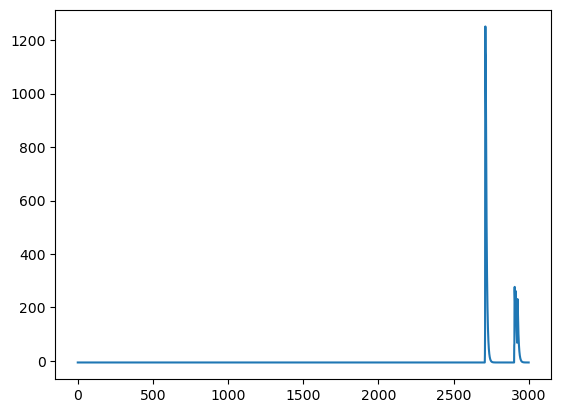

In [38]:
plt.plot(cnmf_refit.estimates.C[1]);

Plot the spike count estimate of second component from refit

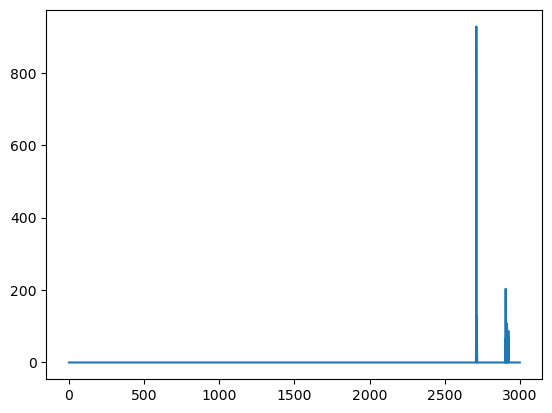

In [39]:
plt.plot(cnmf_refit.estimates.S[1]);

Plot the spike count estimate of the last component from refit

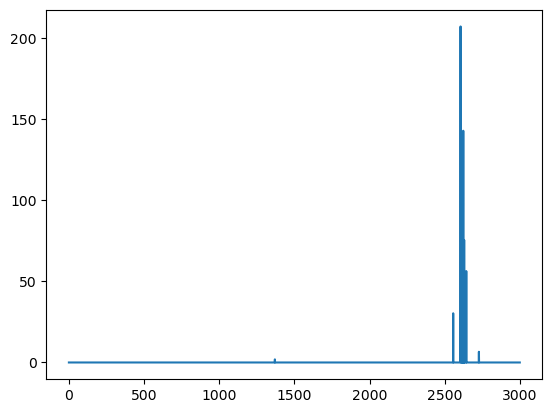

In [40]:
plt.plot(cnmf_refit.estimates.S[-1]);

In [41]:
frame_rate = cnmf_refit.params.data['fr']
frame_pd = 1/frame_rate
frame_times = np.linspace(0, num_frames*frame_pd, num_frames);

data_to_save = np.vstack((frame_times, cnmf_refit.estimates.S)).T 
save_df = pd.DataFrame(data_to_save)
save_df.rename(columns={0:'time'}, inplace=True)
# save_df.to_csv('2p_spike_counts.csv')